✍ Рекомендательные системы строятся на данных о товарах и о пользователях. Но что делать, если какой-то информации не хватает или если данных вообще нет?

В таком случае говорят о **проблеме холодного старта**. Требуется потратить немного времени или сделать несколько шагов, чтобы «разогреть» сервис рекомендаций, прежде чем он начнёт выдавать релевантные результаты с достаточной эффективностью.

Можно выделить два вида проблем холодного старта:

- проблема холодного старта пользователя;
- проблема холодного старта продукта.

# ХОЛОДНЫЙ СТАРТ ПОЛЬЗОВАТЕЛЯ

Когда система сталкивается с новыми посетителями веб-сайта, не имеющими истории просмотров или известных предпочтений, создание персонализированного опыта для них становится сложной задачей, поскольку данные, обычно используемые для создания рекомендаций, отсутствуют.

Рекомендательные системы не могут дать корректную рекомендацию не только для тех, кто впервые заходит на сайт. Пользовательский «холодный старт» может возникнуть даже у постоянных посетителей, если их поведение и предпочтения меняются от одной сессии к другой. С этой проблемой обычно сталкиваются сайты объявлений. К примеру, какое-то время пользователь может искать и сравнивать надувные байдарки, но после того как он купит нужный ему товар, он перейдёт к чему-то другому, совершенно не связанному с предыдущим интересом, например к подержанным укулеле. В таком случае история просмотров пользователя не даст полезных подсказок для угадывания его следующего выбора.

В более широком смысле определённая степень «холодного старта» пользователей будет сохраняться всегда, пока пользователи сервиса будут изучать новые темы, пока их образ жизни, обстоятельства и потребности будут развиваться.

### Зачастую основной метод при работе с новыми пользователями — попросить их в явном виде сообщить свои предпочтения, чтобы создать первоначальный профиль пользователя. Вы могли видеть формат такого взаимодействия на Netflix, когда про интересы и любимые сериалы спрашивают при регистрации.

# ХОЛОДНЫЙ СТАРТ ПРОДУКТА

Когда новый товар добавляется в интернет-магазин или когда свежий контент загружается на медиаплатформу, первое время о нём никто не знает. С нулевым количеством взаимодействий или оценок он практически невидим для рекомендательной системы независимо от того, насколько релевантным он будет для пользователей.

### Среди тех, кто больше всего страдает от этого явления, — сайты объявлений и новостные платформы. Здесь свежие продукты, как правило, самые «горячие», но их ценность быстро снижается: вчерашняя новость сегодня уже устарела, а велосипед, выставленный на продажу на прошлой неделе, уже продан.

# POPULARITY-BASED MODEL

О том, как можно преодолеть холодный старт продукта, мы поговорим в следующем модуле, а сейчас давайте рассмотрим один из вариантов построения рекомендаций в случае холодного старта пользователя.

### Если к нам приходит клиент, про которого мы ничего не знаем, мы можем создать для него рекомендации с использованием popularity-based-модели. Это тип РС, которая формирует рекомендации на основе популярности продуктов. Например, если большинство людей часто покупает определённый продукт, то система знает, что он наиболее востребован среди аудитории, поэтому каждому новому пользователю, который только что зарегистрировался, система будет рекомендовать этот продукт.

## ПРЕИМУЩЕСТВА И НЕДОСТАТКИ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ НА ОСНОВЕ ПОПУЛЯРНОСТИ:

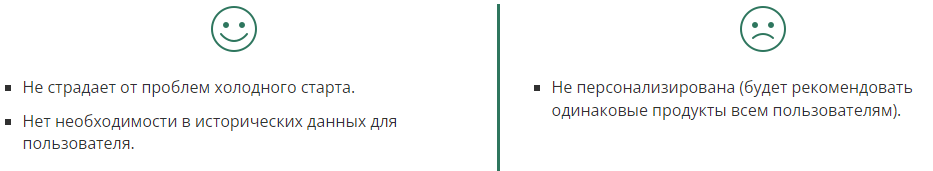

Примеры использования popularity-based-моделей в известных сервисах:

+ Google Новости — новости, отфильтрованные по трендам и самым популярным новостям;
+ YouTube — самые популярные видео.

Давайте на примере рассмотрим, как можно построить систему рекомендаций на основе популярности.

Мы будем работать с набором данных Movie Lens. Он содержит идентификаторы для каждого фильма и пользователя, который его смотрел, а также оценку, которую пользователь поставил фильму. В датасете представлено 25 000 095 оценок фильмов от 162 541 пользователя со шкалой оценок от 0.5 до 5.0.

Из этого набора нам понадобится два файла:

+ [данные о фильмах (movies);](https://lms.skillfactory.ru/assets/courseware/v1/4dc5c1a1e1cc649c1c263450521a00b1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/movie.zip)
+ [данные о выставленных оценках (ratings).](https://drive.google.com/file/d/1HwsPtZ3I9skYVI0EQCGO_nyagJH9aG-E/view?usp=sharing)

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('data/movie.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


Объединим их:

In [4]:
df = pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


+ userId — id пользователя;
+ movieId — id фильма;
+ rating — выставленный пользователем рейтинг для фильма;
+ timestamp — время выставления рейтинга;
+ title — название фильма;
+ genres — жанры, к которым относится фильм.

## Задание 5.1

Подсчитайте, сколько раз каждый фильм встречается в наборе данных. Отметьте среди перечисленных ниже фильмов те, что встречаются в топ-5 по популярности.

In [5]:
movie_popularity = df["title"].value_counts()
print(movie_popularity.head().index)

Index(['Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Shawshank Redemption, The (1994)', 'Silence of the Lambs, The (1991)',
       'Jurassic Park (1993)'],
      dtype='object')


## Задание 5.2

Отлично, мы нашли самые востребованные фильмы. Однако если фильм посмотрело много людей, это ещё не значит, что он им понравился. Чтобы понять, как зритель на самом деле относится к фильму, нужны более чёткие данные. К счастью, в наборе данных Movie Lens есть оценки каждого из зрителей.

+ Найдите средний рейтинг для каждого из фильмов.
+ Найдите фильмы с наивысшим средним рейтингом.
+ Введите в качестве ответа фильм, занимающий последнее место среди фильмов с наивысшим рейтингом, если предварительно отсортировать их по алфавитному порядку.

In [6]:
average_rating_df = df[["title", "rating"]].groupby('title').mean()
sorted_average_ratings = average_rating_df.sort_values(by=["rating",'title'], ascending=False)

print(sorted_average_ratings.head(10))

                                                   rating
title                                                    
Yonkers Joe (2008)                                    5.0
Year Zero: The Silent Death of Cambodia (1979)        5.0
Who Killed Vincent Chin? (1987)                       5.0
When I Walk (2013)                                    5.0
Welcome to Australia (1999)                           5.0
Victor and the Secret of Crocodile Mansion (2012)     5.0
Turkish Dance, Ella Lola (1898)                       5.0
This Thing With Sarah (2013)                          5.0
The great match (2007)                                5.0
The Wrecking Crew (2008)                              5.0


## Задание 5.3

В двух предыдущих заданиях вы использовали два самых простых метода для создания неперсонализированных рекомендаций. Однако у них обоих есть свои недостатки: поиск наиболее часто просматриваемых фильмов не учитывает того, насколько фильм нравится аудитории, а поиск среднего рейтинга может вывести в рекомендуемые фильмы малоизвестные специфические картины с одной-двумя оценками.

Чтобы решить эти проблемы, объединим два подхода и будем искать средний рейтинг только для фильмов, которые были оценены более 50 раз.

Сколько таких фильмов?

In [7]:
movie_popularity = df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies.shape[0])

10472


## Задание 5.4

Постройте простейшую рекомендацию: возьмите фильмы, которые смотрели более 50 раз, и найдите среди них фильм с наивысшей оценкой. В качестве ответа запишите название этого фильма без артикля и года выхода на экран.

In [8]:
movie_popularity = df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index
df2 = df[df.title.isin(popular_movies)]
average_rating_df2 = df2[["title", "rating"]].groupby('title').mean()

sorted_average_ratings = average_rating_df2.sort_values(by=["rating",'title'], ascending=False)

print(sorted_average_ratings.head(10))

                                                 rating
title                                                  
Shawshank Redemption, The (1994)               4.446990
Godfather, The (1972)                          4.364732
Usual Suspects, The (1995)                     4.334372
Schindler's List (1993)                        4.310175
Godfather: Part II, The (1974)                 4.275641
Seven Samurai (Shichinin no samurai) (1954)    4.274180
Rear Window (1954)                             4.271334
Band of Brothers (2001)                        4.263182
Casablanca (1942)                              4.258327
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)  4.256935


По сути, вы только что построили простейшую рекомендательную систему. В следующем юните вы решите более объёмную задачу, пройдя все этапы от предобработки данных до оценки качества получившейся системы рекомендаций.